<a href="https://colab.research.google.com/github/audrey-yung/bio108-work/blob/main/bird_diversity_mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using raw datasets

## Background

The dataset I am using for this notebook is *Bird diversity in remnants of deciduous tropical forest in Central Mexico* which was uploaded to Harvard Dataverse by Mariusz Krzysztof Janczur (from the Autonomous University of Mexico State). This study was conducted in two areas of the Totláli Ecological Park, San Pablo Tejalpa, Zumpahuacan, Mexico: the park zone, which was composed of a mosaic of different habitats: remnants of tropical deciduous forest, organic lemon cultivation, and lawn, and the forest zone, which was tropical deciduous forest. This dataset contains bird species captured by mist nets and recorded by point counts.

You can find the link to the original data [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/QKRK3S). For your convenience, I've uploaded the data files to my Github repository-- you can find that [here](https://github.com/audrey-yung/bio108-work/tree/main/raw-datasets/bird-diversity-central-mexico).

This dataset is not currently associated with a published research article, but there are some simple analyses that have been conducted in the raw data spreadsheets. In this exercise, I replicate these figures using Python.

### Points of interest
The questions I want to investigate are as follows:


1.   What species are present in the study area?
2.   How do the forest and park habitats differ?
3.   Do the observed birds display a preference of one habitat over the other? Are there differences between different life stages?


## Importing the necessary packages

In [ ]:
### importing packages to work with data sets and data frames
import pandas as pd

## Reading in the data

The first file we will be reading in is called "Vegetation Totlali Park Forest_Coefficient of Variation_18Dic2021.xlsx" and can be found in my [Github repository](https://github.com/audrey-yung/bio108-work/tree/main/raw-datasets/bird-diversity-central-mexico). Find that file and open it to see this page:

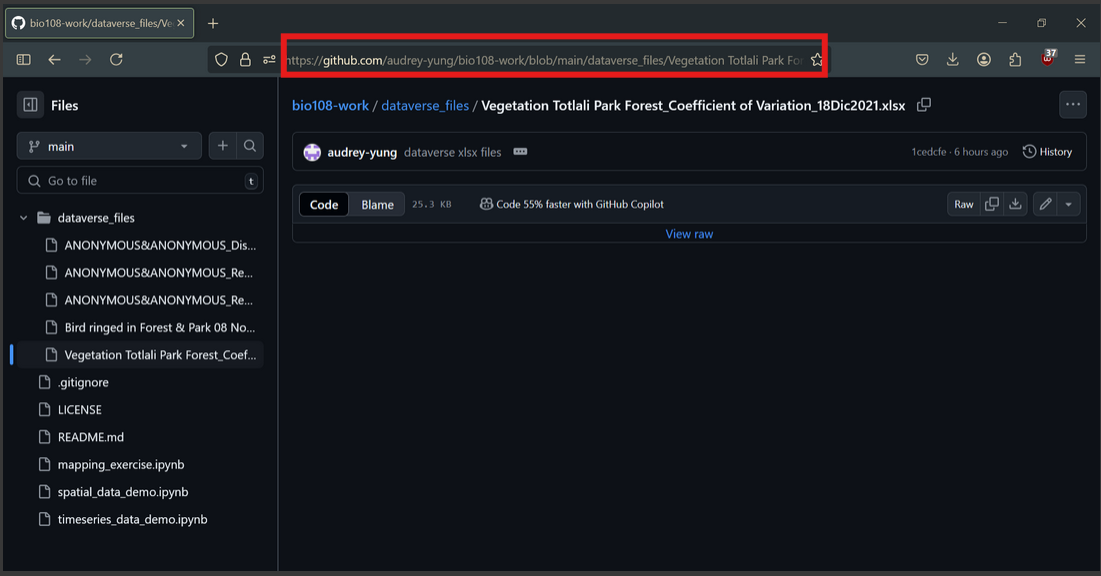

From here, copy the web url and set it as the value of a new variable (I used `veg_mexico_url`).

In [ ]:
### identifying the source for the raw data
veg_mexico_url = "https://github.com/audrey-yung/bio108-work/blob/main/raw-datasets/bird-diversity-central-mexico/Vegetation%20Totlali%20Park%20Forest_Coefficient%20of%20Variation_18Dic2021.xlsx" + "?raw=true"

Note that the syntax I used to define `veg_mexico_url` has `+ "?raw=true"` tacked on at the end. This tells Colab/Python that we want to extract the raw data that is associated with the link that we are directing it to, rather than just the identity of the web url.

Now, we are going to use the `pandas` package (which we've abbreviated as `pd`) to read in the file. In many other tutorials, you may use the function `.read_csv()`, but in this demo, we are working with `.xlsx` files, so we will use `.read_excel` instead.

In [ ]:
# using pd.read_excel to read in the data
veg_mexico = pd.read_excel(veg_mexico_url)

It's generally good practice to use `.head()` to take a look at what the data you just loaded in looks like. Let's take a look at `veg_mexico`:

In [ ]:
### using .head() to check how the data frame looks
veg_mexico.head()

,"In July 2021, in each count point, we recorded the height of the highest plant from each stratum (tree, shrub and herbaceous) within the ten-meter-diameter with respect to the center of the influence zone of the count point"
0,"Additionally, we took a fish-eye photography o..."
1,"We used 180-198°, 0.28x, max. diameter 25 mm, ..."
2,We used the Gap Light Analyzer software to est...
3,"As some count points lay in open areas, the ca..."
4,"We put the phone on 120 cm height, on the trip..."


Now, this is odd considering we were expecting to see a datasheet of some sorts-- something like this:

 ![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fdatacarpentry.github.io%2Fspreadsheet-ecology-lesson%2Ffig%2Fsingle-info.png&f=1&nofb=1&ipt=fce8d21287fd25b51a1b8700ed0fa2ff4cc09fc47454ab87b9ddaea9ad24fcb3&ipo=images)

If we download and open the source spreadsheet in Excel, this is what we will see:

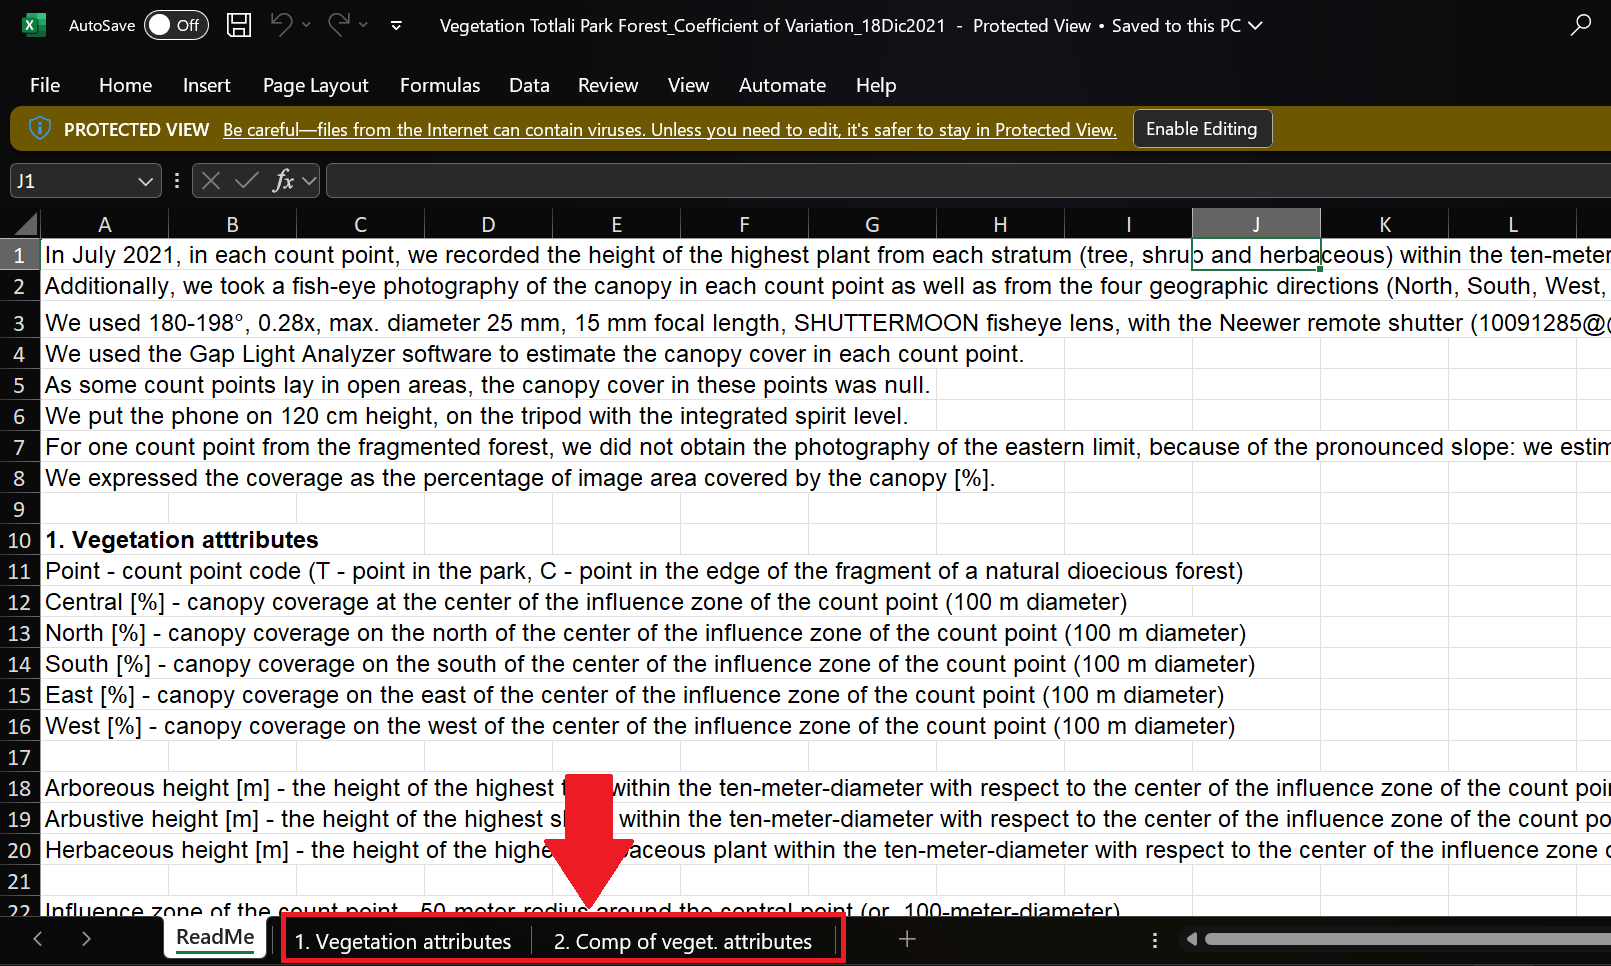

What we see here is that the first sheet of the spreadsheet is a ReadMe tab, where the metadata about the document is stored. What we need is to get to the second sheet on this document, titled "1. Vegetation attributes", which we can do by applying the `sheet_name = ` function.

In [ ]:
### applying sheet_name =
veg_mexico = pd.read_excel(veg_mexico_url,
                           sheet_name=1     # this is indexing the second sheet in this spreadsheet (the first sheet would be index 0)
                           )

In [ ]:
### using .head() to check how the data frame looks
veg_mexico.head()

,Unnamed: 0,Point,Central [%],North [%],South [%],East [%],West [%],Arboreous height [m],Arbustive height [m],Herbaceous height [m],Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Forest,1C,65.74,86.75,93.64,24.92,100.00,6.7,2.06,1.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Forest,2C,88.80,99.27,100.00,44.12,100.00,8.7,3.20,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Forest,3C,84.53,99.88,99.85,20.10,100.00,4.8,1.94,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Forest,4C,44.74,90.66,21.91,27.52,99.32,7.8,1.74,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Forest,5C,85.88,38.54,55.87,24.60,100.00,7.2,1.98,1.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If we look back at the original spreadsheet, we can see that there are some notes that the original authors have made that are not relevant to us. We only want what I have outlined in the red box. Python doesn't necessarily acknowledge the bar plot that is in the sheet, so we can use the `usecols = ` function to isolate the columns that we want to use.

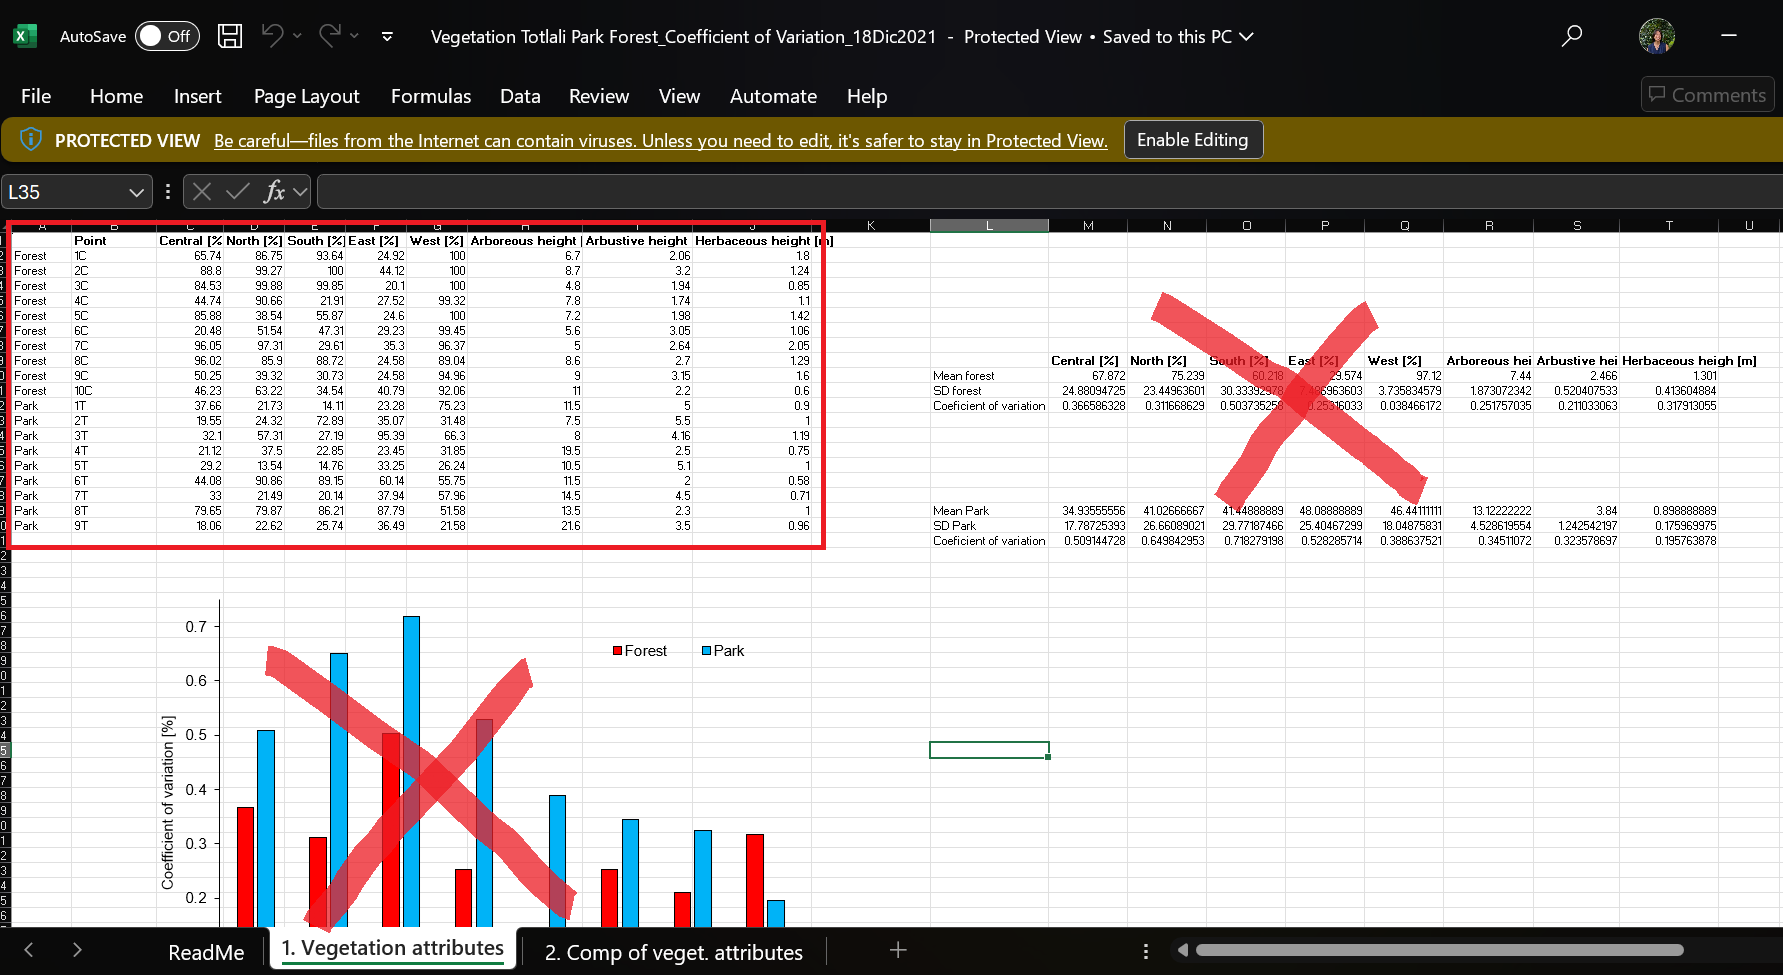

In [ ]:
### adding usecols =
veg_mexico = pd.read_excel(veg_mexico_url,
                            sheet_name=1,     # this is indexing the second sheet in this spreadsheet (the first sheet would be index 0)
                            usecols = "A:J"   # we are selecting only columns A through J
                            )

In [ ]:
### using .head() to check how the data frame looks
veg_mexico.head()

,Unnamed: 0,Point,Central [%],North [%],South [%],East [%],West [%],Arboreous height [m],Arbustive height [m],Herbaceous height [m]
0,Forest,1C,65.74,86.75,93.64,24.92,100.00,6.7,2.06,1.80
1,Forest,2C,88.80,99.27,100.00,44.12,100.00,8.7,3.20,1.24
2,Forest,3C,84.53,99.88,99.85,20.10,100.00,4.8,1.94,0.85
3,Forest,4C,44.74,90.66,21.91,27.52,99.32,7.8,1.74,1.10
4,Forest,5C,85.88,38.54,55.87,24.60,100.00,7.2,1.98,1.42


The first column in the original dataset is not labeled. We can label it for ease of access later on by using `.rename()`.

In [ ]:
### using .rename to change column title
veg_mexico.rename(columns={"Unnamed: 0": "habitat_type"},
                  inplace=True  # replacing the original column title
                  )

In [ ]:
veg_mexico.head()

,habitat_type,Point,Central [%],North [%],South [%],East [%],West [%],Arboreous height [m],Arbustive height [m],Herbaceous height [m]
0,Forest,1C,65.74,86.75,93.64,24.92,100.00,6.7,2.06,1.80
1,Forest,2C,88.80,99.27,100.00,44.12,100.00,8.7,3.20,1.24
2,Forest,3C,84.53,99.88,99.85,20.10,100.00,4.8,1.94,0.85
3,Forest,4C,44.74,90.66,21.91,27.52,99.32,7.8,1.74,1.10
4,Forest,5C,85.88,38.54,55.87,24.60,100.00,7.2,1.98,1.42


## Practice: reading in bird count data
Now that we've had a chance to look at how to tidy up some messy and raw data, try to do it on your own! Once again, go back to my [Github repository](https://github.com/audrey-yung/bio108-work/tree/main/raw-datasets/bird-diversity-central-mexico) to access the file "Bird ringed in Forest & Park 08 Nov 2021.xlsx". The two sheets of interest in the spreadsheet are the **second and third** sheets-- "Birds ringed in the forest" and "Birds ringed in the park", respectively.

Please name the "Birds ringed in the forest" data as `birdcounts_forest` and "Birds ringed in the park" as `birdcounts_park`.

For your convenience, I'll show you what the raw data looks like:

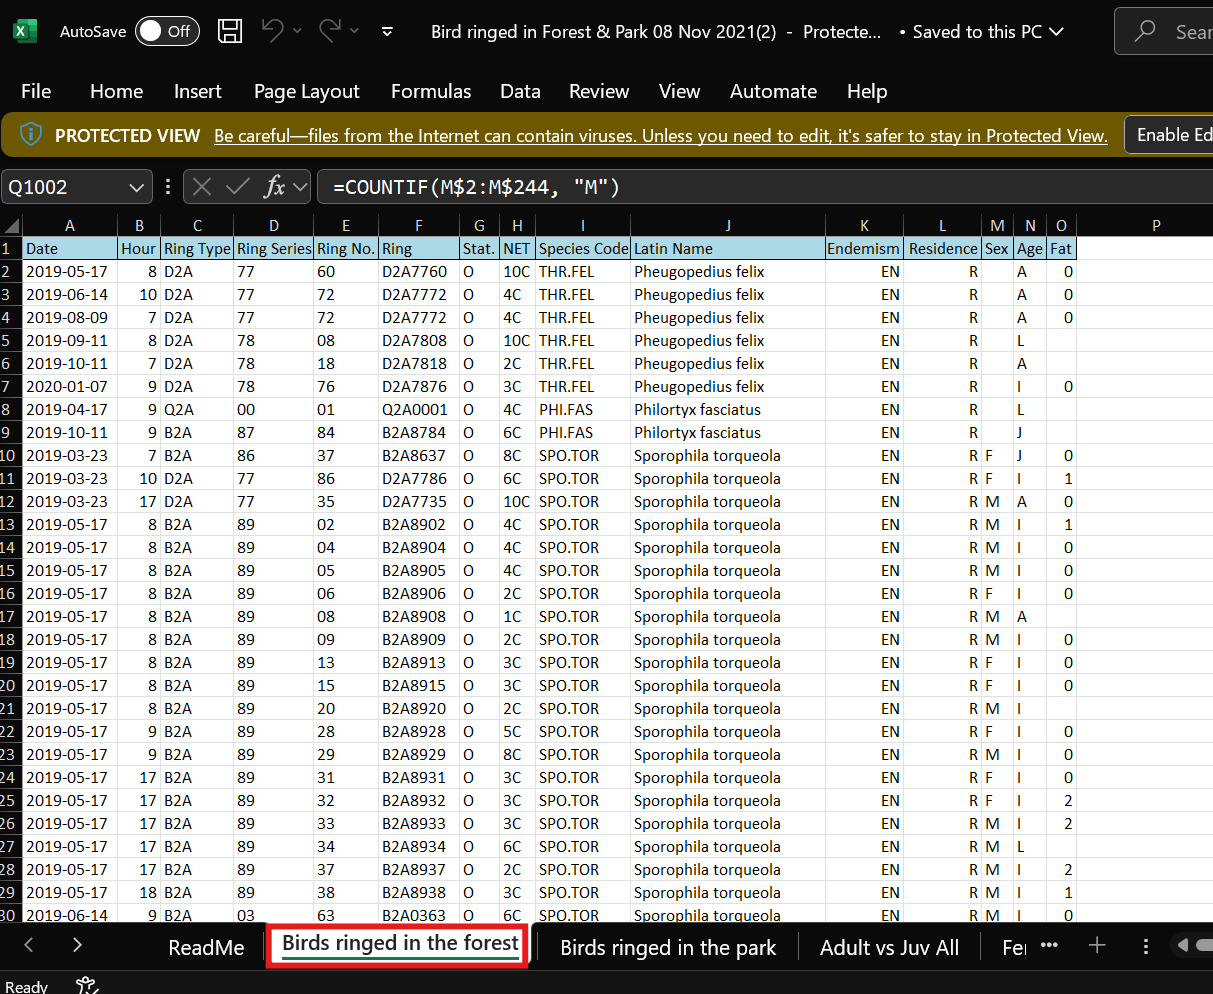

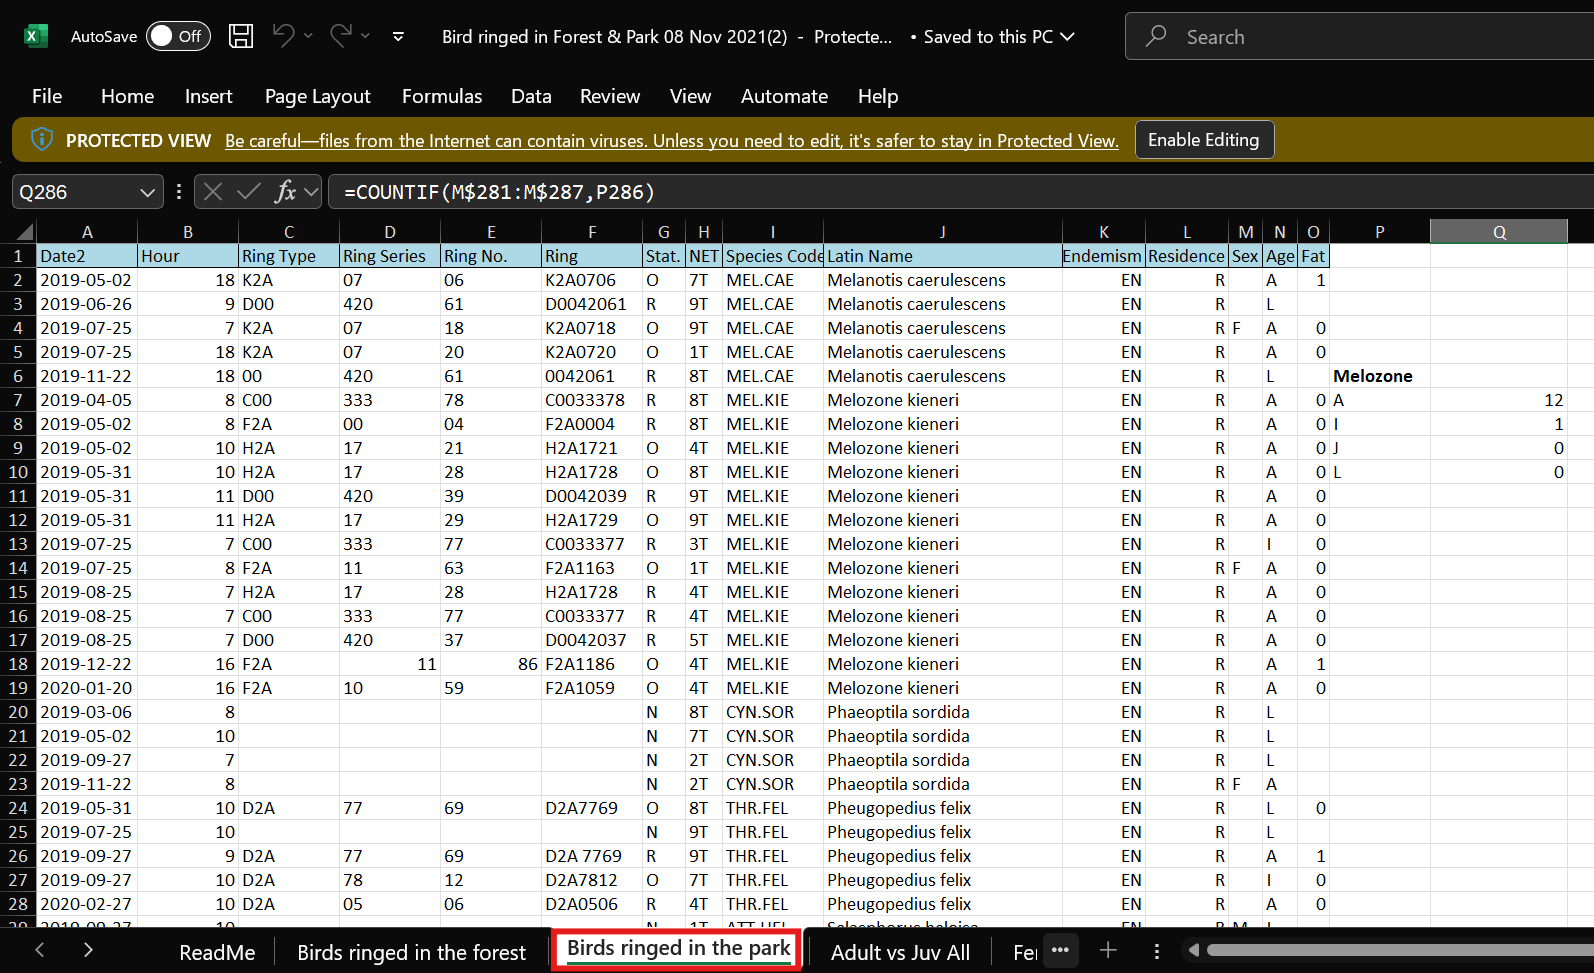

In [ ]:
### accessing the github url
birdcounts_url = "https://github.com/audrey-yung/bio108-work/blob/main/raw-datasets/bird-diversity-central-mexico/Bird%20ringed%20in%20Forest%20%26%20Park%2008%20Nov%202021.xlsx" + "?raw=true"

### reading in the "birds ringed in forest" sheet
birdcounts_forest = pd.read_excel(birdcounts_url,
                                  sheet_name = 1,
                                  usecols = "A:O")
### reading in the "birds ringed in the park" sheet
birdcounts_park = pd.read_excel(birdcounts_url,
                                  sheet_name = 2,
                                  usecols = "A:O")

In [ ]:
birdcounts_park.head()

,Date2,Hour,Ring Type,Ring Series,Ring No.,Ring,Stat.,NET,Species Code,Latin Name,Endemism,Residence,Sex,Age,Fat
0,2019-05-02,18.0,K2A,7.0,6.0,K2A0706,O,7T,MEL.CAE,Melanotis caerulescens,EN,R,NaN,A,1.0
1,2019-06-26,9.0,D00,420.0,61.0,D0042061,R,9T,MEL.CAE,Melanotis caerulescens,EN,R,NaN,L,NaN
2,2019-07-25,7.0,K2A,7.0,18.0,K2A0718,O,9T,MEL.CAE,Melanotis caerulescens,EN,R,F,A,0.0
3,2019-07-25,18.0,K2A,7.0,20.0,K2A0720,O,1T,MEL.CAE,Melanotis caerulescens,EN,R,NaN,A,0.0
4,2019-11-22,18.0,00,420.0,61.0,0042061,R,8T,MEL.CAE,Melanotis caerulescens,EN,R,NaN,L,NaN


In [ ]:
birdcounts_forest.head()

,Date,Hour,Ring Type,Ring Series,Ring No.,Ring,Stat.,NET,Species Code,Latin Name,Endemism,Residence,Sex,Age,Fat
0,2019-05-17,8.0,D2A,77.0,60.0,D2A7760,O,10C,THR.FEL,Pheugopedius felix,EN,R,NaN,A,0.0
1,2019-06-14,10.0,D2A,77.0,72.0,D2A7772,O,4C,THR.FEL,Pheugopedius felix,EN,R,NaN,A,0.0
2,2019-08-09,7.0,D2A,77.0,72.0,D2A7772,O,4C,THR.FEL,Pheugopedius felix,EN,R,NaN,A,0.0
3,2019-09-11,8.0,D2A,78.0,8.0,D2A7808,O,10C,THR.FEL,Pheugopedius felix,EN,R,NaN,L,NaN
4,2019-10-11,7.0,D2A,78.0,18.0,D2A7818,O,2C,THR.FEL,Pheugopedius felix,EN,R,NaN,A,NaN


## Merging two data frames together

If we use `.head()` for `birdcounts_park` and `birdcounts_forest`, we will see that they both contain the same information. If you were to use this data to create figures, it would be much more convenient to:


1.   Have all the information in one data frame instead of two
2.   Know which data are from the park or the forest



Before we merge the two data frames into one, we need to label where all the data points are coming from (either the `birdcounts_forest` or `birdcounts_park`).

In the same way that we can use `dataframe["column name"]` to call a column in a dataframe, we can create a new column by calling the data frame and naming the new column like this: `dataframe["new column name"]`. you will see here that i am setting the value as `"Forest"` or `"Park"` -- what this does is enter the given value for all rows in the new column that we've created.

In [ ]:
birdcounts_forest["Location"] = "Forest"
birdcounts_park["Location"] = "Park"

Now we can use `.head()` again to check what the first few rows of each data frame look like.

In [ ]:
birdcounts_forest.head()

,Date,Hour,Ring Type,Ring Series,Ring No.,Ring,Stat.,NET,Species Code,Latin Name,Endemism,Residence,Sex,Age,Fat,Location
0,2019-05-17,8.0,D2A,77.0,60.0,D2A7760,O,10C,THR.FEL,Pheugopedius felix,EN,R,NaN,A,0.0,Forest
1,2019-06-14,10.0,D2A,77.0,72.0,D2A7772,O,4C,THR.FEL,Pheugopedius felix,EN,R,NaN,A,0.0,Forest
2,2019-08-09,7.0,D2A,77.0,72.0,D2A7772,O,4C,THR.FEL,Pheugopedius felix,EN,R,NaN,A,0.0,Forest
3,2019-09-11,8.0,D2A,78.0,8.0,D2A7808,O,10C,THR.FEL,Pheugopedius felix,EN,R,NaN,L,NaN,Forest
4,2019-10-11,7.0,D2A,78.0,18.0,D2A7818,O,2C,THR.FEL,Pheugopedius felix,EN,R,NaN,A,NaN,Forest


In [ ]:
birdcounts_park.head()

,Date2,Hour,Ring Type,Ring Series,Ring No.,Ring,Stat.,NET,Species Code,Latin Name,Endemism,Residence,Sex,Age,Fat,Location
0,2019-05-02,18.0,K2A,7.0,6.0,K2A0706,O,7T,MEL.CAE,Melanotis caerulescens,EN,R,NaN,A,1.0,Park
1,2019-06-26,9.0,D00,420.0,61.0,D0042061,R,9T,MEL.CAE,Melanotis caerulescens,EN,R,NaN,L,NaN,Park
2,2019-07-25,7.0,K2A,7.0,18.0,K2A0718,O,9T,MEL.CAE,Melanotis caerulescens,EN,R,F,A,0.0,Park
3,2019-07-25,18.0,K2A,7.0,20.0,K2A0720,O,1T,MEL.CAE,Melanotis caerulescens,EN,R,NaN,A,0.0,Park
4,2019-11-22,18.0,00,420.0,61.0,0042061,R,8T,MEL.CAE,Melanotis caerulescens,EN,R,NaN,L,NaN,Park


You may have noticed that the name of one of the columns looks different between the two data frames. Did you catch it?

This is important to note because when we combine our two data frames, we need the columns that have the same information to have the same column names.

Again, we can use the `.rename()` function to change the name of the `Date2` column in the `birdcounts_park` data frame to `Date`. Go back to the example in [this section of the demo](https://colab.research.google.com/drive/1olT5A82T9TYfVhTaPBJNdwY7JcmiCxiO#scrollTo=I9575mYW-S8D) and try this yourself.

In [ ]:
### renaming the Date2 column to Date in the birdcounts_park dataframe.


Time to actually merge two data frames together-- there are a number of functions in the `pandas` package that can combine two data frames together in various ways (see [this link](https://pandas.pydata.org/docs/user_guide/merging.html) for a mini demo on the different ways), but for this demo today, we will be using the `concat` function.

The `concat()` function takes two data frames and combines them along a certain axis (vertically or horizontally). When the axis is not specified, the function defaults to a horizontal axis.

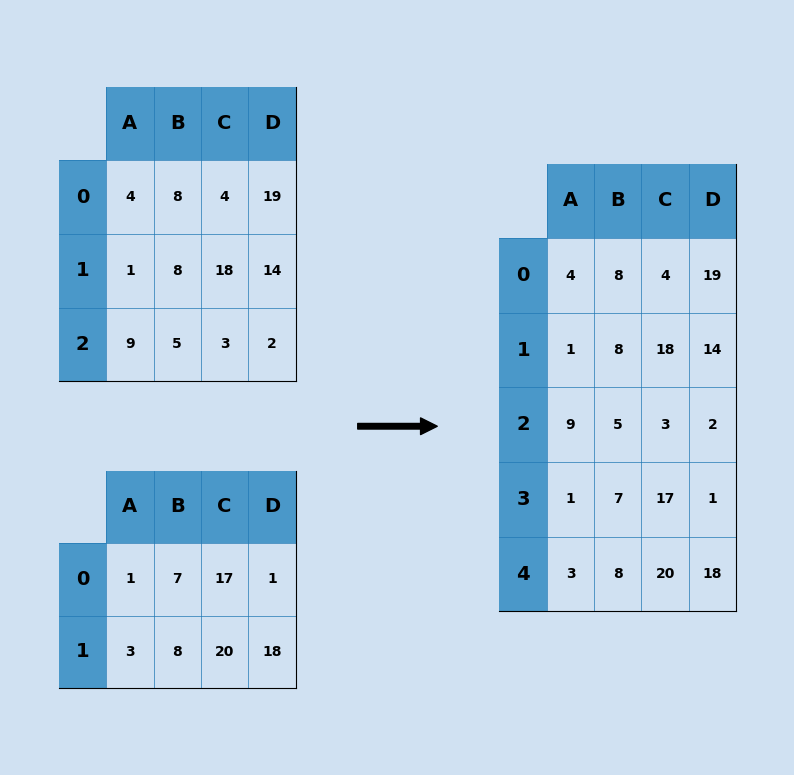

In [ ]:
### combinig the birdcounts_forest and birdcounts_park dataframes using pd.concat()
birdcounts_all = pd.concat([birdcounts_forest, birdcounts_park])

As always, it is a good idea to check the new dataframe with `.head()`.

In [ ]:
### checking the new dataframe with .head()
birdcounts_all.head()

,Date,Hour,Ring Type,Ring Series,Ring No.,Ring,Stat.,NET,Species Code,Latin Name,Endemism,Residence,Sex,Age,Fat,Location
0,2019-05-17,8.0,D2A,77.0,60.0,D2A7760,O,10C,THR.FEL,Pheugopedius felix,EN,R,NaN,A,0.0,Forest
1,2019-06-14,10.0,D2A,77.0,72.0,D2A7772,O,4C,THR.FEL,Pheugopedius felix,EN,R,NaN,A,0.0,Forest
2,2019-08-09,7.0,D2A,77.0,72.0,D2A7772,O,4C,THR.FEL,Pheugopedius felix,EN,R,NaN,A,0.0,Forest
3,2019-09-11,8.0,D2A,78.0,8.0,D2A7808,O,10C,THR.FEL,Pheugopedius felix,EN,R,NaN,L,NaN,Forest
4,2019-10-11,7.0,D2A,78.0,18.0,D2A7818,O,2C,THR.FEL,Pheugopedius felix,EN,R,NaN,A,NaN,Forest


# Data analysis

A reminder of our original points of interest:
1.   What species are present in the study area?
2.   How do the forest and park habitats differ?
3.   Do the observed birds display a preference of one habitat over the other? Are there differences between different life stages?


We can answer the first question about abundance within species very easily using the `.value_counts()` function.

In [ ]:
### using .value_counts to see number of individuals observed in each species
birdcounts_all["Latin Name"].value_counts()

,count
Latin Name,
Sporophila torqueola,234
Volatinia jacarina,198
Leucolia violiceps,65
Spinus psaltria,57
Melospiza lincolnii,47
...,...
Piaya cayana,1
Leptotila verreauxi,1
Parkesia noveboracensis,1


We can apply the `len()` function onto the above code to see how many species in total were observed.

In [ ]:
### using len() to determine how many species were observed
len(birdcounts_all["Latin Name"].value_counts())

100

## Making figures

For this section, we will need to import new packages to make our figures.

`matplotlib` is commonly used, but for today's demo I will be largely working with the `seaborn` package and supplementing with `matplotlib` as needed.


In [ ]:
### import packages to make plots
import seaborn as sns
import matplotlib.pyplot as plt

To make the second figure, we can combine a number of comparative plots to see if there were any observed differences in how the park and forest zones may differ. For this figure, we will go back to the `veg_mexico` dataframe and take a look at what information we can utilize.

In [ ]:
### referring back to veg_mexico
veg_mexico.head()

,habitat_type,Point,Central [%],North [%],South [%],East [%],West [%],Arboreous height [m],Arbustive height [m],Herbaceous height [m]
0,Forest,1C,65.74,86.75,93.64,24.92,100.00,6.7,2.06,1.80
1,Forest,2C,88.80,99.27,100.00,44.12,100.00,8.7,3.20,1.24
2,Forest,3C,84.53,99.88,99.85,20.10,100.00,4.8,1.94,0.85
3,Forest,4C,44.74,90.66,21.91,27.52,99.32,7.8,1.74,1.10
4,Forest,5C,85.88,38.54,55.87,24.60,100.00,7.2,1.98,1.42


The three rightmost columns would be the most informative in comparing the habitat qualities.

<Axes: xlabel='Herbaceous height [m]', ylabel='habitat_type'>

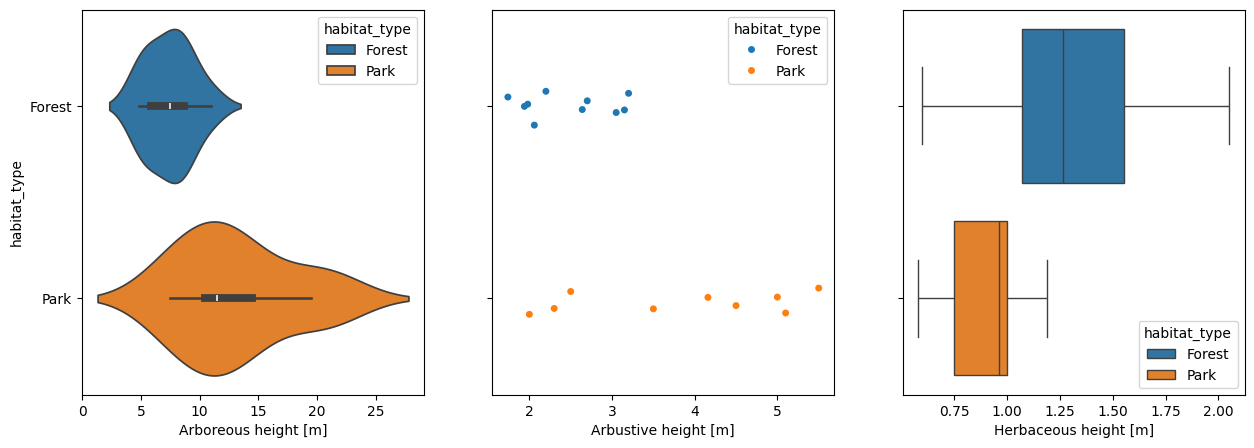

In [ ]:
## defining a space for the combined figure
fig, axs = plt.subplots(ncols=3,      # the combined figure will have three subplots (in three columns)
                        sharey=True)  # all three subplots will share the same y-axis
fig.set_figheight(5)                  # height of figure is 5 units
fig.set_figwidth(15)                  # width of figure is 15 units

## the first plot will be a violin plot
sns.violinplot(data=veg_mexico,         # using the veg_mexico dataframe
              x="Arboreous height [m]", # x-axis is the arboreous height column
              y="habitat_type",         # y-axis is the habitat type (forest or park)
              hue="habitat_type",       # the colors for habitat type will be different
              ax = axs[0])              # this will be the first plot via index 0

## second plot is a strip plot
sns.stripplot(data=veg_mexico,
              x="Arbustive height [m]", # x-axis is arbustive height column
              y="habitat_type",
              hue="habitat_type",
              ax = axs[1])              # second plot placement via index 1

## third plot is a box plot
sns.boxplot(data=veg_mexico,
              x="Herbaceous height [m]",# x-axis is herbaceous height column
              y="habitat_type",
              hue="habitat_type",
              ax = axs[2])              # third plot placement via index 2

For the third question, we can determine where birds how birds are distributed between the two zones by making a `countplot`.

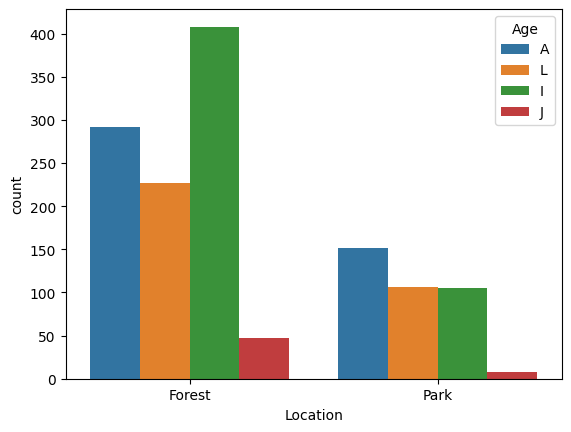

In [ ]:
### using countplot from sns package to make a figure
agebylocation = sns.countplot(birdcounts_all, # going back to the birdcounts_all data frame
                              x="Location",   # sorted by location (park or forest)
                              hue="Age")      # grouped by age

The legend is based on the raw data format, so we can go back to our original data source `birdcount_url` and read in the data once again. This time we can direct our query to the first sheet, which will have the metadata in the `Readme` tab. Because we are only looking at the information in this sheet and not directly using any of the data in it, we don't need to set it as a defined variable.

In [ ]:
### reading in the metadata sheet from birdcounts_url
pd.read_excel(birdcounts_url,
                           sheet_name = 0)

,Dataset for the bird individuals caught with mist nets in the fragment of forest and park zone
0,"in Totlali Ecological Park, Municipality of Zu..."
1,NaN
2,Data - monitoring day
3,Hour - monitoring hour
4,NaN
5,Ring Type - codified size and material of the ...
6,Ring series - series of the ring (band)
7,Ring No. - order of the ring in the series
8,NaN
9,Bird satatus:


Although the formatting is odd, we can see in rows 20 through 23 what each of the age codes stand for.

We can use the `.legend` function from the `matplotlib` package (abbreviated to `plt`) to tack on a legend of our own and edit the labels.

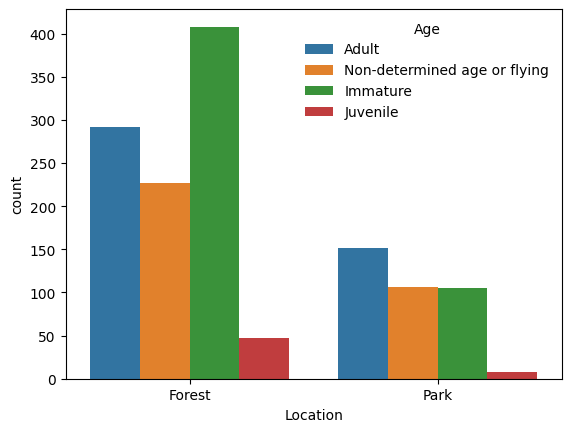

In [ ]:
agebylocation = sns.countplot(birdcounts_all, x="Location", hue="Age")
plt.legend(title='Age',
           loc='upper right',     # setting the placement of the legend
           labels=["Adult", "Non-determined age or flying", "Immature", "Juvenile"],    # renaming the categories for more clarity
           frameon = False)       # removing the frame around the legend (this is purely aesthetic)
plt.show(agebylocation) # showing the legend on the figure we made

# Final takeaways

The figures we just made helped us answer our three original questions and provided a lot of valuable insight, despite being quite simple.

We now know what species were observed throughout the duration of this study. Also, the figure we created to compare vegetation types between the park and forest zones indicate that there are differences between the relative amounts of different vegetation types in the two zones.
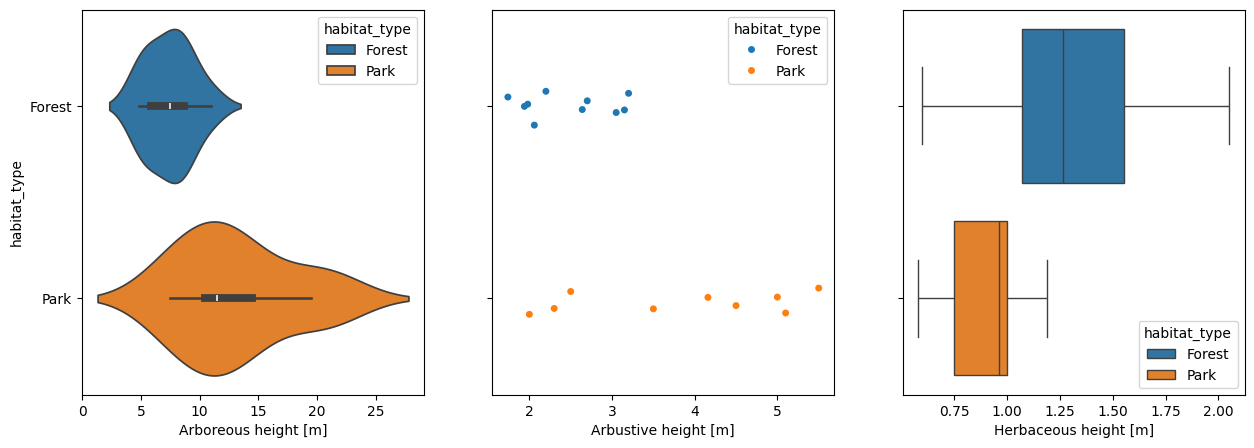

Finally, the bird count figure suggests that the birds do exhibit a preference between the two habitat types. While these figures do not clearly show whether these results are statistically significant, the analyses to gain understanding on significant will be much more easy to conduct now that the raw data has been tidied up.

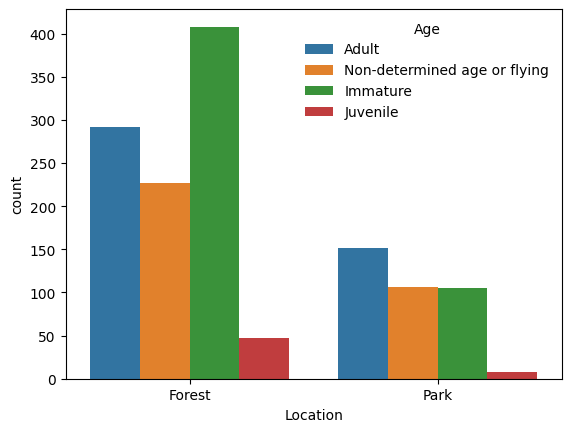

I hope that this demo helped you gain a better understanding of
* different tactics to help clean up messy raw data
* how to analyze clean data to draw conclusions through plotted figures

Congrats on making it through!

# Additional notes


## Sample answer code ot read in bird count data
```
### accessing the github url
birdcounts_url = "https://github.com/audrey-yung/bio108-work/blob/main/raw-datasets/bird-diversity-central-mexico/Bird%20ringed%20in%20Forest%20%26%20Park%2008%20Nov%202021.xlsx" + "?raw=true"

### reading in the "birds ringed in forest" sheet
birdcounts_forest = pd.read_excel(birdcounts_url,
                           sheet_name = 1,
                           usecols = "A:O")

### reading in the "birds ringed in the park" sheet
birdcounts_park = pd.read_excel(birdcounts_url,
                           sheet_name = 2,
                           usecols = "A:O")
```

```
birdcounts_forest.head()
birdcounts_park.head()
```


## Sample answer for renaming Date2 column in birdcounts_park dataframe
```
### renaming the Date2 column to Date in the birdcounts_park dataframe.
birdcounts_park.rename(columns={'Date2':'Date'},
                       inplace=True)
                       
```

## Troubleshooting code
If the code for reading in the data from the raw url for `veg_mexico_url` or `birdcounts_url` doesnt work, download the data from the [Github repository](https://github.com/audrey-yung/bio108-work/tree/main/raw-datasets/bird-diversity-central-mexico) or this [Google Drive](https://drive.google.com/drive/folders/1a-0ReqPXtyuBDpRpFIEt3gcTGwDgJa9O?usp=sharing) link.

Upload the data manually to Colab by opening the file explorer on the left toolbar.

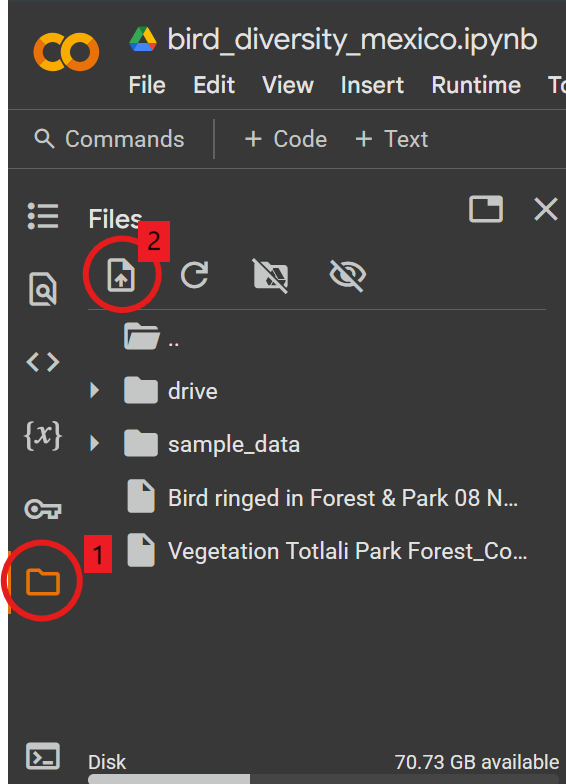

Run this code instead to read in the data.
```
### Alternative code to read in data if github is not working

# reading in veg_mexico data
veg_mexico = pd.read_excel("Vegetation Totlali Park Forest_Coefficient of Variation_18Dic2021.xlsx",
                            sheet_name=1,     # this is indexing the second sheet in this spreadsheet (the first sheet would be index 0)
                            usecols = "A:J"   # we are selecting only columns A through J
                            )

# reading in birdcount_forest data
birdcounts_forest = pd.read_excel("Bird ringed in Forest & Park 08 Nov 2021.xlsx",
                                sheet_name = 1,
                                usecols = "A:O"
                                )

# reading in birdcount_park data
birdcounts_park = pd.read_excel("Bird ringed in Forest & Park 08 Nov 2021.xlsx",
                                sheet_name = 2,
                                usecols = "A:O"
                                )
```